In [19]:
import numpy as np
import matplotlib.pyplot as plt


def compute_infiltration(Ks, theta_s, theta_i, psi, rain_intensity,
                         F_max=1.0, n_points=500):
    delta_theta = theta_s - theta_i
    F_p = (delta_theta * psi) / (1 - rain_intensity / Ks)
    t_p = F_p / rain_intensity
    F = np.linspace(0, F_max, n_points)
    # avoid division by zero
    F_safe = np.where(F == 0, np.finfo(float).eps, F)
    f = np.where(F < F_p,
                 rain_intensity,
                 Ks * (1 - (delta_theta * psi) / F_safe))
    return F, f, F_p, t_p


def plot_infiltration(F, f, F_p, Ks):
    # make the figure wider so tick labels are farther apart
    plt.figure(figsize=(10, 4))
    plt.plot(F, f, label="Infiltration rate")
    plt.axvline(F_p, color="red", linestyle="--", label="F_p (ponding)")
    plt.axhline(Ks, color="green", linestyle=":", label="K_s")
    # set x-limits based on data and choose a few evenly spaced ticks
    plt.xlim(F.min(), F.max())
    ticks = np.linspace(F.min(), F.max(), 6)
    plt.xticks(ticks)
    # major grid thicker
    plt.grid(which='major', linewidth=0.8)
    # add thin grey minor grid lines on y-axis at 0.2 intervals
    ax = plt.gca()
    ax.set_yticks(np.arange(0, max(f.max(), Ks) + 0.2, 0.2), minor=True)
    ax.grid(which='minor', axis='y', color='gray', linestyle='-', linewidth=0.2)
    plt.xlabel("Infiltration volume F (in)")
    plt.ylabel("Infiltration rate f (in/hr)")
    plt.title("Infiltration rate vs. volume")
    plt.legend()
    plt.tight_layout()
    plt.savefig("infiltration.png", dpi=150)
    plt.show()


Delta theta: 0.303
Ponding F_p: 0.252 in, t_p: 0.039 hr


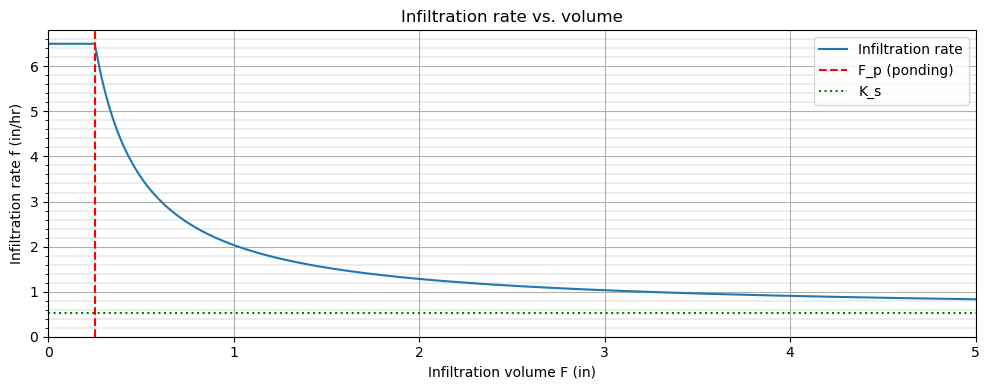

In [20]:
Ks, theta_s, theta_i, psi, rain_intensity = 0.53, 0.518, 0.215, -9.37, 6.5

# compute out to F = 5 inches 
F, f, F_p, t_p = compute_infiltration(Ks, theta_s, theta_i, psi,
                                      rain_intensity, F_max=5.0)
print(f"Delta theta: {theta_s - theta_i:.3f}")
print(f"Ponding F_p: {F_p:.3f} in, t_p: {t_p:.3f} hr")

plot_infiltration(F, f, F_p, Ks)
